# Maximum a posteriori (MAP)

\begin{align*}
\mathrm{MAP} 
= \bigg (\prod_{i=1}^{m}p(x^{(i)}|\theta)\bigg) p(\theta)
= \bigg (\prod_{i=1}^{m} \sum_{z^{(i)}} p(x^{(i)}, z^{(i)} | \theta) \bigg) p(\theta)
\end{align*}

# Derivating EM algorithm for MAP

Take log to both sides and apply Jensen's inequality

For convex function:

$$ E[f(X)] \ge f(E[X])$$

For concave function (e.g. log in this case):

$$ f(E[X]) \ge E[f(X)]$$

**Detour 1**: 1-D illustration for Jensen's inequality:

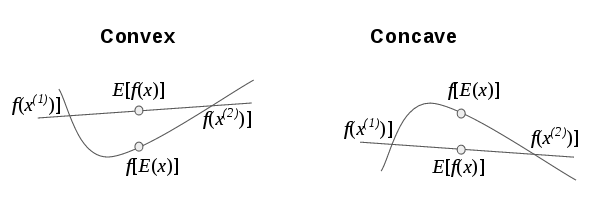

In [1]:
from IPython.display import Image

Image('./jensens-inequality-1D.png')

\begin{align*}
\mathrm{log MAP} 
&= \sum_{i=1}^{m} \mathrm{log} \bigg (\sum_{z^{(i)}} p(x^{(i)}, z^{(i)} | \theta) \bigg) + \mathrm{log}(p(\theta)) \\
&= \sum_{i=1}^{m} \mathrm{log} \bigg (\sum_{z^{(i)}} Q_i(z^{(i)}) \frac{p(x^{(i)}, z^{(i)}| \theta)}{Q_i(z^{(i)})} \bigg) + \mathrm{log}(p(\theta)) \\
&\geq \sum_{i=1}^{m} \bigg (\sum_{z^{(i)}} Q_i(z^{(i)}) \mathrm{log} \frac{p(x^{(i)}, z^{(i)}| \theta)}{Q_i(z^{(i)})} \bigg) + \mathrm{log}(p(\theta)) \\
\end{align*}

where $Q_i$ is a distribution over $z$ for data point $i$.

In the E-step, we want to tighten the lower bound (i.e. convert $\ge$ into $=$), which is easily achievable by setting 
$\frac{p(x^{(i)}, z^{(i)}| \theta)}{Q_i(z^{(i)})}$ a constant, i.e. let

$$\frac{p(x^{(i)}, z^{(i)}| \theta)}{Q_i(z^{(i)})} = c$$

Also, since $Q_i$ is a probability distribution, so it should sum up to one over $z$. So,

\begin{align*}
\sum_{z^{(i)}} Q_{i}(z^{(i)}) = \sum_{z^{(i)}} \frac{p(x^{(i)}, z^{(i)}| \theta)}{c} = 1
\end{align*}

Then,

$$ c = \frac{1}{\sum_{z^{(i)}} p(x^{(i)}, z^{(i)}| \theta)} = \frac{1}{p(x^{(i)}| \theta)} $$

So,

\begin{align*}
Q_i(z^{(i)})
&= \frac{p(x^{(i)}, z^{(i)}| \theta)}{p(x^{(i)}| \theta)}
\\
&= p(z^{(i)} | x^{(i)}, \theta)
\end{align*}

### EM algorithm

Therefore, we could formalize the EM algorithm for MAP as below,

In the **E-step**, for each data point $i$, set

$$Q_i(z^{(i)}) = p(z^{(i)} | x^{(i)}, \theta)$$

In the **M-step**, parameterize $\theta$ to maximize $\mathrm{log MAP}$,

\begin{align*}
\theta &= \arg\!\max_{\theta} (\mathrm{logMAP}) \\
&= \arg\!\max_{\theta} \bigg[ \sum_{i=1}^{m} \bigg (\sum_{z^{(i)}} Q_i(z^{(i)}) \mathrm{log} \frac{p(x^{(i)}, z^{(i)}| \theta)}{Q_i(z^{(i)})} \bigg) + \mathrm{log}(p(\theta)) \bigg] \\
\end{align*}

Given that RHS is a particular form of $\mathrm{logMAP}$ after applying Jensen's inequality, I would like to label it as $Z$ for convenience later. 

Inspecting this algorithm, what it's doing is basically to 

1. estabilish a lower bound of $\mathrm{log MAP}$ in the E-step, and then
1. tune parameters ($\theta$) in order to maximize the lower bound.

**Detour 2**: about the name Expectation-Maximization:

Expectation probably refers to the quantity:

$$\sum_{z^{(i)}} Q_i(z^{(i)}) \mathrm{log} \frac{p(x^{(i)}, z^{(i)}| \theta)}{Q_i(z^{(i)})}$$

The algorithm is indeed about maximizing the sum of expectations over all data points, but I thought the name might be too generic and not illustrative of the process of lower bound estabilishing. Anyway, I interpret the name as following:

* E-step is the step of setting an expectation
* M-step is the step of maximizing the expectation.

### Next, we will prove each EM iteration is monotonically improving $\mathrm{log MAP}$.

Suppose after an EM iteration at step $t$,

* $Q_i^{(t)} = p(z^{(i)} | x^{(i)}, \theta^{(t-1)})$
* $\theta = \theta^{(t)}$

so

\begin{align*}
\mathrm{logMAP}(\theta^{(t)}) 
&= \sum_{i=1}^{m} \mathrm{log} \bigg (\sum_{z^{(i)}} Q_i^{(t)}(z^{(i)}) \frac{p(x^{(i)}, z^{(i)}| \theta^{(t)})}{Q_i^{(t)}(z^{(i)})} \bigg) + \mathrm{log}(p(\theta^{(t)}))
\\
&\ge \sum_{i=1}^{m} \bigg (\sum_{z^{(i)}} Q_i^{(t)}(z^{(i)}) \mathrm{log} \frac{p(x^{(i)}, z^{(i)}| \theta^{(t)})}{Q_i^{(t)}(z^{(i)})} \bigg) + \mathrm{log}(p(\theta^{(t)}))
\end{align*}

Now, we start a new EM iteration at step $t+1$.

In the E-step, we set a new lower bound for each $i$ with

$$Q_i^{(t+1)}(z^{(i)}) = p(z^{(i)} | x^{(i)}, \theta^{(t)})$$

Then replacing $Q_i^{(t)}$ with $Q_i^{(t+1)}$ in the above equation,

\begin{align*}
\mathrm{logMAP}(\theta^{(t)}) 
&= \sum_{i=1}^{m} \mathrm{log} \bigg (\sum_{z^{(i)}} Q_i^{(t+1)}(z^{(i)}) \frac{p(x^{(i)}, z^{(i)}| \theta^{(t)})}{Q_i^{(t+1)}(z^{(i)})} \bigg) + \mathrm{log}(p(\theta^{(t)}))
\\
&= \sum_{i=1}^{m} \bigg (\sum_{z^{(i)}} Q_i^{(t+1)}(z^{(i)}) \mathrm{log} \frac{p(x^{(i)}, z^{(i)}| \theta^{(t)})}{Q_i^{(t+1)}(z^{(i)})} \bigg) + \mathrm{log}(p(\theta^{(t)}))
\end{align*}

Note the first equlity applies with whatever distribution $Q_i$, and the second inequality becomes equality become we reached the lower bound with the newly set $Q_i = Q_i^{(t+1)}$.

Then in the M-step, we maximize ${\mathrm{logMAP}}$ to obtain $\theta = \theta^{(t+1)}$, so

\begin{align*}
\mathrm{logMAP}(\theta^{(t+1)})
&= \sum_{i=1}^{m} \mathrm{log} \bigg (\sum_{z^{(i)}} Q_i^{(t+1)}(z^{(i)}) \frac{p(x^{(i)}, z^{(i)}| \theta^{(t+1)})}{Q_i^{(t+1)}(z^{(i)})} \bigg) + \mathrm{log}(p(\theta^{(t+1)}))
\\
&\ge \sum_{i=1}^{m} \bigg (\sum_{z^{(i)}} Q_i^{(t+1)}(z^{(i)}) \mathrm{log} \frac{p(x^{(i)}, z^{(i)}| \theta^{(t+1)})}{Q_i^{(t+1)}(z^{(i)})} \bigg) + \mathrm{log}(p(\theta^{(t+1)})) \\
&\ge \sum_{i=1}^{m} \bigg (\sum_{z^{(i)}} Q_i^{(t+1)}(z^{(i)}) \mathrm{log} \frac{p(x^{(i)}, z^{(i)}| \theta^{(t)})}{Q_i^{(t+1)}(z^{(i)})} \bigg) + \mathrm{log}(p(\theta^{(t)})) \\
&= \mathrm{logMAP}(\theta^{(t)})
\end{align*}


Here,

* the 1st equality is just the definition of $\mathrm{logMAP}$
* the 2nd inequality is again an application of Jensen's inequality
* the 3nd inequality is a result of the maximization process, in which $\theta^{(t)}$ becomes $\theta^{(t+1)}$. Note, $\mathrm{log}p(x, z|\theta)$ and $\mathrm{log}p(\theta)$ are supposed to be concave in $\theta$ and tractable as assumed in the lecture notes. So the maximization process is tractable
* the 4th equality is just a restatement of the last equation after $Q_i^{(t)}$ => $Q_i^{(t+1)}$ replacement

Therefore, we proved, EM monotonically increases $\mathrm{logMAP}$, thereby $\mathrm{MAP}$.

**Note**: The derivation is actually very analogous to that in the lecture notes on EM: http://cs229.stanford.edu/notes/cs229-notes8.pdf except for the additional standalone $\log{p(\theta)}$ in the log likelihood.